In [1]:
import pandas as pd
import torch
from torch_geometric.data import DataLoader
from torch import nn
from smallDatasetGenerator import *
from GNNTE import *

/home/francesco.pugnaloni/anaconda3/envs/HPIPyG/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
data = load_test_training_stuff("/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/")

In [29]:
data.keys()

dict_keys(['tables', 'graphs', 'triples'])

In [30]:
data['graphs']['0'].edges.shape

torch.Size([2, 8])

In [31]:
data['triples'].shape

(100, 3)

In [32]:
gtd = GraphTriplesDataset(data['triples'], data['graphs'])

In [33]:
d = gtd[0]

In [34]:
gtd[2][0]['edge_index']

tensor([[ 7,  3,  7,  0,  8,  3,  8,  1,  9,  3,  9,  2, 10,  4, 10,  0, 11,  4,
         11,  1, 12,  4, 12,  2,  8,  5,  8,  0, 13,  5, 13,  1, 10,  5, 10,  2,
         14,  6, 14,  0, 15,  6, 15,  1, 16,  6, 16,  2],
        [ 3,  7,  0,  7,  3,  8,  1,  8,  3,  9,  2,  9,  4, 10,  0, 10,  4, 11,
          1, 11,  4, 12,  2, 12,  5,  8,  0,  8,  5, 13,  1, 13,  5, 10,  2, 10,
          6, 14,  0, 14,  6, 15,  1, 15,  6, 16,  2, 16]], device='cuda:0')

In [35]:
train_dataloader = DataLoader(gtd, batch_size=25, shuffle=True)

In [36]:
l = []
for i in train_dataloader:
    l.append(i)

In [37]:
l[0][0]['edge_index'].to('cuda')

tensor([[  7,   3,   7,  ..., 620, 636, 616],
        [  3,   7,   0,  ..., 636, 616, 636]], device='cuda:0')

In [38]:
type(list(data['graphs'].keys())[0])

str

In [39]:
for batch in train_dataloader:
    print(batch)

[DataBatch(x=[584, 300], edge_index=[2, 2848], batch=[584], ptr=[26]), DataBatch(x=[560, 300], edge_index=[2, 2644], batch=[560], ptr=[26]), tensor([0.4422, 0.3953, 0.4357, 0.0077, 0.7624, 0.8733, 0.7745, 0.4941, 0.4377,
        0.7602, 0.1292, 0.6353, 0.0391, 0.3701, 0.7095, 0.1510, 0.1035, 0.7768,
        0.0290, 0.0850, 0.7549, 0.1310, 0.1681, 0.7088, 0.0742])]
[DataBatch(x=[663, 300], edge_index=[2, 3548], batch=[663], ptr=[26]), DataBatch(x=[658, 300], edge_index=[2, 3552], batch=[658], ptr=[26]), tensor([0.0767, 0.5914, 0.4497, 0.5803, 0.0376, 0.4863, 0.7274, 0.6427, 0.0061,
        0.3346, 0.2363, 0.6764, 0.4420, 0.5077, 0.1152, 0.4198, 0.6740, 0.6621,
        0.6671, 0.1549, 0.1771, 0.4299, 0.9512, 0.3395, 0.8320])]
[DataBatch(x=[626, 300], edge_index=[2, 3164], batch=[626], ptr=[26]), DataBatch(x=[604, 300], edge_index=[2, 3280], batch=[604], ptr=[26]), tensor([0.1140, 0.6785, 0.1973, 0.0786, 0.9124, 0.3368, 0.1622, 0.7461, 0.9242,
        0.8290, 0.7410, 0.6247, 0.2520, 0.670

In [40]:
batch = l[0]

In [41]:
model = GIN(-1,300,3).to('cuda')

In [42]:
gtd.graphs['0'].X

tensor([[-0.0703,  0.0888,  0.0126,  ..., -0.1402,  0.0226,  0.0484],
        [-0.0907,  0.1135,  0.0150,  ..., -0.1588,  0.0267,  0.0645],
        [-0.0498,  0.0641,  0.0102,  ..., -0.1216,  0.0185,  0.0324],
        [-0.0907,  0.1135,  0.0150,  ..., -0.1588,  0.0267,  0.0645],
        [-0.0498,  0.0641,  0.0102,  ..., -0.1216,  0.0185,  0.0324]])

In [43]:
gtd.graphs['0'].edges

tensor([[3, 1, 3, 0, 4, 2, 4, 0],
        [1, 3, 0, 3, 2, 4, 0, 4]], device='cuda:0')

In [44]:
model(gtd.graphs['0'].X.to('cuda'),gtd.graphs['0'].edges.to('cuda')).shape

torch.Size([5, 300])

In [45]:
batch = l[0]

In [46]:
type(batch)

list

In [49]:
batch[2].shape

torch.Size([25])

In [47]:
gbatch = batch[0]

In [143]:
type(gbatch)

torch_geometric.data.batch.DataBatch

In [144]:
gbatch[1]

Data(x=[31, 300], edge_index=[2, 192])

In [145]:
gbatch.num_graphs

25

In [146]:
intervals = [0]+[gbatch[i]['x'].shape[0] for i in range(len(gbatch))]

In [147]:

from tqdm import tqdm
li = list(range(10000000))
l = [0]
for t in li:
    l.append(l[-1]+t)

In [148]:
gbatch

DataBatch(x=[577, 300], edge_index=[2, 3092], batch=[577], ptr=[26])

In [149]:
gbatch[0]['x'].shape[0]

11

In [150]:
out = model(gbatch['x'].to('cuda'), gbatch['edge_index'].to('cuda'))

In [151]:
out[0].shape

torch.Size([300])

In [152]:
tensor = torch.tensor([[1.0, 2.0, 3.0],
                       [4.0, 5.0, 6.0]])

In [153]:
tensor.shape

torch.Size([2, 3])

In [154]:
torch.mean(tensor, dim=0).shape

torch.Size([3])

In [155]:
import torch

# Example tensors
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

# Concatenate along dimension 0
concatenated_tensor = torch.cat((tensor1.unsqueeze(dim=0), tensor2.unsqueeze(dim=0)), dim=0)

print(concatenated_tensor)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [156]:
my_model = GNNTE(100,3)

In [157]:
out = model(gbatch['x'].to('cuda'), gbatch['edge_index'].to('cuda'))

In [158]:
gbatch['x'].to('cuda')

tensor([[-0.0349, -0.0655,  0.0415,  ...,  0.0701, -0.0300,  0.0642],
        [-0.0829,  0.1732, -0.0271,  ..., -0.2305,  0.0243,  0.0664],
        [ 0.0295, -0.0276, -0.0211,  ...,  0.0401, -0.0036,  0.0136],
        ...,
        [-0.0823,  0.2050, -0.0476,  ..., -0.2261,  0.0221,  0.0751],
        [-0.0267, -0.0463,  0.0250,  ..., -0.0153,  0.0012, -0.0230],
        [-0.0016, -0.0375,  0.0227,  ...,  0.0200,  0.0058, -0.0349]],
       device='cuda:0')

In [159]:
gbatch['edge_index'].to('cuda')

tensor([[  5,   3,   5,  ..., 571, 576, 568],
        [  3,   5,   0,  ..., 576, 568, 576]], device='cuda:0')

In [160]:
out[23]

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [161]:
data = load_test_training_stuff("/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/triples.csv","/dati/home/francesco.pugnaloni/wikipedia_tables/small_dataset_debug/graphs.pkl")
gtd = GraphTriplesDataset(data['triples'], data['graphs'])
train_dataloader = DataLoader(gtd, batch_size=25, shuffle=True)
l = []
for i in train_dataloader:
    l.append(i)
batch = l[0]
gbatch = batch[0].to('cuda')
my_model = GNNTE(5,3)
out = my_model(gbatch)
print('ok')

ok


/home/francesco.pugnaloni/anaconda3/envs/HPIPyG/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [164]:
gbatch

DataBatch(x=[684, 300], edge_index=[2, 3684], batch=[684], ptr=[26])

In [165]:
torch.nan

nan

In [167]:
torch.sum(torch.isnan(out))

tensor(90, device='cuda:0')

In [168]:
len(data['graphs'])

50

In [12]:
tot = 0
l = []
for i in range(50):
    tot += torch.sum(torch.isnan(data['graphs'][str(i)].X))
    if torch.sum(torch.isnan(data['graphs'][str(i)].X)) != 0:
        l.append(i)

In [11]:
tot

tensor(18000)

In [ ]:
l

In [171]:
torch.sum(torch.isnan(data['graphs'][str(1)].X[12:18]))

tensor(300)

In [172]:
data['graphs'][str(1)].X[12:18]

tensor([[-0.0267, -0.0463,  0.0250,  ..., -0.0153,  0.0012, -0.0230],
        [ 0.0342, -0.0144,  0.0316,  ...,  0.0586, -0.0051,  0.0112],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [-0.0639,  0.0235, -0.0104,  ...,  0.0544, -0.0450,  0.0753],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041],
        [-0.0735,  0.0810,  0.0016,  ..., -0.0184,  0.0524, -0.0111]])

In [175]:
data['graphs'].X[13]

tensor([ 3.4220e-02, -1.4418e-02,  3.1561e-02,  2.7710e-03, -1.2453e-04,
         2.5195e-02, -1.9256e-02, -6.1987e-02,  3.6241e-02, -1.3131e-02,
         8.0752e-02,  6.5243e-04,  2.8308e-02,  5.7992e-04, -6.9884e-02,
        -7.7855e-02,  6.1163e-02, -1.3620e-01,  1.8274e-02, -4.5137e-02,
         3.3244e-02, -9.4968e-02,  3.6478e-02,  1.8895e-02,  6.0276e-02,
         8.6723e-02, -3.7946e-03,  2.3424e-02,  2.4898e-02,  3.9104e-02,
         2.9422e-02, -2.2442e-02,  4.8203e-02,  7.2193e-02, -2.5699e-03,
        -3.6526e-02,  1.7312e-02, -1.4082e-02, -2.9193e-03,  3.6887e-02,
         1.6916e-02, -1.1618e-01,  3.5573e-02, -8.4303e-02,  2.5318e-02,
         3.3375e-02,  3.2912e-02, -6.4352e-02,  5.4359e-02,  4.5138e-02,
         3.7985e-02,  8.0404e-02, -2.9606e-02, -7.6558e-02, -7.3798e-03,
         2.7716e-02,  8.7097e-02,  2.8702e-02, -5.6983e-02,  1.3051e-01,
         6.7886e-02, -4.6071e-02,  3.1253e-02,  6.1368e-04,  6.6252e-02,
         3.2440e-02, -1.8302e-02, -3.7581e-03, -1.1

In [177]:
for g in data['graphs'].values():
    if g == None:
        print('lui')

In [4]:
t1 =[
    ["ciao sono mario", '7',7],
    ["ferrovia",pd.NA,"12"]
    ]

In [5]:
df = pd.DataFrame(t1)

In [6]:
df

,0,1,2
0,ciao sono mario,7,7
1,ferrovia,<NA>,12


In [8]:
df.to_csv("/home/francesco.pugnaloni/tmp/test_table.csv", index=False)

In [2]:
from smallDatasetGenerator import *

In [4]:
generate_test_training_stuff(50, 100, "/home/francesco.pugnaloni/tmp/small_tables",3,3)

Loading fasttext model, it will take 2/3 minutes


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/francesco.pugnaloni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model loaded
Graphs generation starts


100%|██████████| 50/50 [00:01<00:00, 38.63it/s]

Graph generation ends
Saving output
Output saved


In [3]:
data = load_test_training_stuff("/home/francesco.pugnaloni/tmp/small_tables")

In [6]:
data

{'tables': {'0':                            0
  0  I have a pen and an apple
  1                          3
  2                          2,
  '1':      0
  0  dog,
  '2':                                            0   
  0  The plot of the book is that it is a book  \
  1                                          8   
  2                                        cat   
  
                                                     1   
  0                                                cat  \
  1  this sentence will be pretty long and hopefull...   
  2                                                  1   
  
                             2  
  0                    Leopard  
  1  I have a pen and an apple  
  2                          2  ,
  '3':                                                    0   
  0                          I have a pen and an apple  \
  1  this sentence will be pretty long and hopefull...   
  2                                                  2   
  
                    

In [4]:
tot = 0
l = []
for i in range(50):
    tot += torch.sum(torch.isnan(data['graphs'][str(i)].X))
    if torch.sum(torch.isnan(data['graphs'][str(i)].X)) != 0:
        l.append(i)

In [5]:
tot

tensor(1800)

In [6]:
l

[22, 25, 29, 34, 37, 43]

In [7]:
data['tables']['22']

,0,1
0,The plot of the book is that it is a book,I have a pen and an apple
1,this sentence will be pretty long and hopefull...,dog
2,this sentence will be pretty long and hopefull...,The plot of the book is that it is a book


In [11]:
t = data['tables']['25']

In [10]:
t['2'] = [pd.NA, 15, pd.NA]

In [14]:
t

,0,2
0,this sentence will be pretty long and hopefull...,<NA>
1,4,15
2,this sentence will be pretty long and hopefull...,<NA>


In [15]:
data['graphs']['25'].X

tensor([[-0.0572,  0.0316,  0.0197,  ..., -0.1033,  0.0134,  0.0009],
        [ 0.0004, -0.0362, -0.0040,  ..., -0.0115, -0.0181, -0.0023],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [ 0.0004, -0.0362, -0.0040,  ..., -0.0115, -0.0181, -0.0023],
        [-0.1147,  0.0994,  0.0433,  ..., -0.1951,  0.0449,  0.0041]])

In [16]:
torch.sum(torch.isnan(data['graphs']['25'].X))

tensor(300)

In [16]:
tmp = torch.Tensor([
    [1,2,3],
    [2,5,1],
    [1,6,9],
    [3,6,9]
])

In [17]:
tmp

tensor([[1., 2., 3.],
        [2., 5., 1.],
        [1., 6., 9.],
        [3., 6., 9.]])

In [18]:
l = [1,2,1]
tmp[l]

tensor([[2., 5., 1.],
        [1., 6., 9.],
        [2., 5., 1.]])

In [22]:
tmp1 = torch.Tensor([
    [1,2,3],
    [2,5,1],
    [1,6,9],
    [3,6,9]
])

tmp2 = torch.Tensor([
    [1,2,3],
    [2,6,1],
    [2,1,5],
    [3,6,9]
])

In [23]:
import torch.nn.functional as F

In [24]:
F.cosine_similarity(tmp1, tmp2, dim=1)

tensor([1.0000, 0.9980, 0.8908, 1.0000])

In [1]:
import pandas as pd
from trainingTriplesPreprocessing import *

In [2]:
df = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/processed_tables/test_samples_no_small_tables.csv")

In [3]:
df.shape

(1486091, 3)

100%|██████████| 1486091/1486091 [00:00<00:00, 2191849.28it/s]


{0.8: 179114,
 0.3: 170101,
 0.4: 119736,
 0.9: 142098,
 0.5: 89382,
 0.7: 100776,
 0.6: 70789,
 0.0: 172623,
 0.2: 168583,
 0.1: 272889}

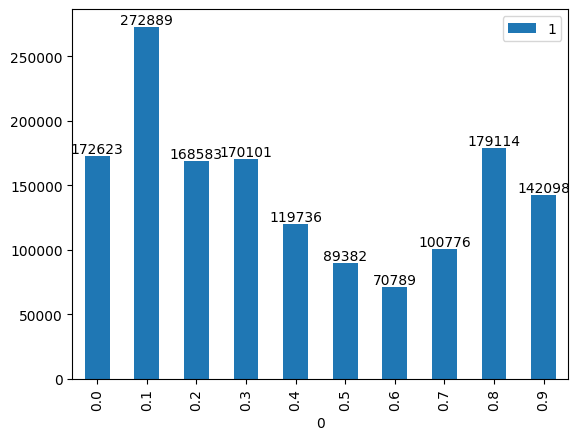

In [4]:
show_samples_distribution(df)

In [2]:
df = generate_small_triple_dataset(100)

In [3]:
df.shape

(100, 3)

In [4]:
df

,r_id,s_id,table_overlap
0,475.624970,475.62498,0.853659
1,492.106062,497.41440,0.571429
2,387.152780,489.23273,0.476190
3,205.768010,492.11052,0.290909
4,182.161740,239.94505,0.111111
...,...,...,...
95,579.589090,579.58924,0.846154
96,409.136973,448.68844,0.166667
97,159.102112,218.83592,0.197802
98,566.149830,566.14997,0.975610


In [1]:
import pandas as pd

In [2]:
df_no_small = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/processed_tables/test_samples_no_small_tables.csv")

In [3]:
df_no_small.shape

(1486091, 3)

In [2]:
df_train = pd.read_csv("/dati/home/francesco.pugnaloni/wikipedia_tables/training_data/millions_of_tables/samples.csv")

In [5]:
df_train.shape

(1486091, 3)

In [3]:
from trainingTriplesPreprocessing import show_samples_distribution

100%|██████████| 1486091/1486091 [00:00<00:00, 2090741.58it/s]


{0.8: 179114,
 0.3: 170101,
 0.4: 119736,
 0.9: 142098,
 0.5: 89382,
 0.7: 100776,
 0.6: 70789,
 0.0: 172623,
 0.2: 168583,
 0.1: 272889}

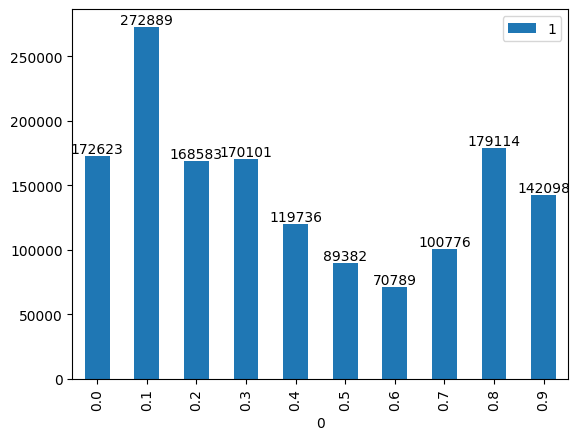

In [7]:
show_samples_distribution(df_train)

100%|██████████| 1486091/1486091 [00:00<00:00, 2014610.23it/s]


{9.0: 70174,
 3.3: 47263,
 8.5: 22341,
 4.0: 10518,
 3.5: 7258,
 8.8: 10003,
 4.1: 4258,
 4.9: 11255,
 9.3: 12755,
 8.3: 39452,
 5.9: 33129,
 8.0: 35289,
 7.3: 5255,
 6.6: 20023,
 6.2: 5089,
 9.9: 1645,
 9.1: 11766,
 8.7: 10894,
 0.8: 21648,
 7.4: 30773,
 9.2: 17195,
 4.7: 60070,
 6.9: 9369,
 6.5: 3997,
 8.1: 12631,
 4.4: 3847,
 2.9: 13164,
 5.3: 4765,
 2.0: 30066,
 1.7: 15963,
 4.5: 4960,
 3.7: 5255,
 9.4: 15606,
 5.5: 4312,
 9.5: 12873,
 5.0: 1801,
 5.4: 4708,
 2.6: 11916,
 1.0: 58904,
 3.1: 8224,
 6.4: 4898,
 2.7: 12891,
 2.4: 27908,
 9.7: 8051,
 7.1: 20490,
 3.0: 15717,
 9.6: 12139,
 8.9: 3793,
 4.3: 3506,
 4.8: 6201,
 0.7: 26293,
 1.9: 15007,
 7.2: 7834,
 5.6: 3455,
 5.1: 3799,
 5.2: 3522,
 4.2: 8773,
 3.8: 56141,
 3.9: 2526,
 6.8: 6496,
 3.6: 8626,
 4.6: 6348,
 2.8: 10331,
 8.6: 5936,
 6.3: 4450,
 2.3: 19000,
 2.2: 21678,
 7.8: 5317,
 7.7: 5347,
 1.4: 18649,
 5.7: 26023,
 1.6: 23570,
 1.8: 22658,
 6.1: 6583,
 3.2: 14361,
 7.6: 8506,
 9.8: 4825,
 6.7: 3143,
 7.0: 5826,
 5.8: 3868,

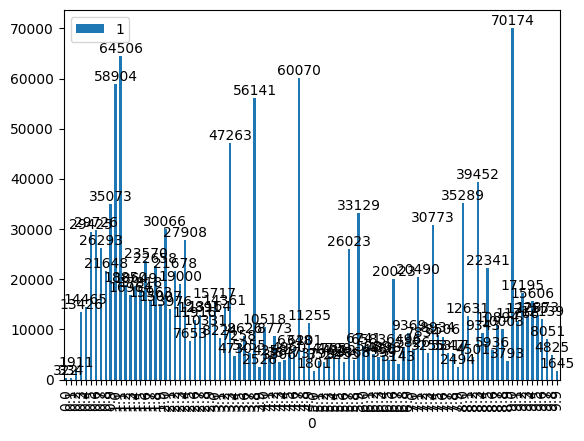

In [4]:
show_samples_distribution(df_train, granularity=0.01)

TypeError: 'float' object cannot be interpreted as an integer